# Co2 emission stats from wandb

https://wandb.ai/fair_face_recognition/face-rec-models?nw=nwusergabriellaangela

## Plot sum of co2 emission between adafca eand magface


In [8]:
import wandb
import pandas as pd

# Login to wandb
wandb.login()

# Initialize wandb API
api = wandb.Api()

# Specify your project and entity
entity = "fair_face_recognition"  # replace with your wandb entity
project = "face-rec-models"  # replace with your wandb project name

# Get all runs in the project
runs = api.runs(f"{entity}/{project}")


In [7]:
runs

<Runs fair_face_recognition/face_rec_models>

In [9]:
# Print information about each run to inspect
for run in runs:
    print(f"Run ID: {run.id}")
    print(f"Run Name: {run.name}")
    print(f"Run Config: {run.config}")
    print(f"Run Summary: {run.summary}")
    print("="*40)

Run ID: hkdz4oxh
Run Name: adaface-fine-tuner
Run Config: {'epochs': 26}
Run Summary: {'_step': 7539, 'epoch': 25, '_wandb': {'runtime': 37569}, '_runtime': 37569.26571369171, 'lr': 1e-05, '_timestamp': 1718090009.5130126, 'train_acc1': 8.984375, 'train_acc5': 18.359375, 'train_loss': 10.019453048706056, 'CO2 emission (in Kg)': None}
Run ID: ltqscepo
Run Name: adaface-fine-tuner
Run Config: {'epochs': 26}
Run Summary: {'_timestamp': 1718081210.6087208, 'CO2 emission (in Kg)': None, 'train_acc5': 15.234375, 'train_loss': 12.378727912902832, 'lr': 1e-05, '_step': 11907, 'epoch': 25, '_wandb': {'runtime': 59832}, '_runtime': 59832.83195781708, 'train_acc1': 5.859375}
Run ID: 49dr4s17
Run Name: adaface-fine-tuner
Run Config: {'epochs': 26}
Run Summary: {'lr': 1e-05, '_wandb': {'runtime': 48031}, 'train_acc1': 7.03125, 'train_loss': 12.280338287353516, '_step': 11907, 'epoch': 25, '_runtime': 48030.03599452973, '_timestamp': 1718068684.5788925, 'train_acc5': 12.890625, 'CO2 emission (in Kg)

In [12]:

# Initialize an empty list to collect data
data = []

# Loop through each run and get the CO2 emissions data
for run in runs:
    # Assuming 'co2_emission' is the name of the metric you logged
    if 'CO2 emission (in Kg)' in run.summary:
        co2_emission = run.summary['CO2 emission (in Kg)']
        # You can add more fields from the run if needed
        data.append({
            "run_type": run.name,  # e.g. "adaface-fine-tuner"
            "run_id": run.id,
            "co2_emission": co2_emission,
        })


In [13]:

# Create a DataFrame
df_co2 = pd.DataFrame(data)

# Save to CSV
df_co2.to_csv("co2_emissions.csv", index=False)

print("CSV file saved as co2_emissions.csv")


CSV file saved as co2_emissions.csv


In [15]:
df = pd.read_csv("co2_emissions.csv")

In [16]:
df

,run_type,run_id,co2_emission
0,adaface-fine-tuner,hkdz4oxh,NaN
1,adaface-fine-tuner,ltqscepo,NaN
2,adaface-fine-tuner,49dr4s17,NaN
3,adaface-fine-tuner,22hwmla8,NaN
4,adaface-fine-tuner,3vslskg0,NaN
...,...,...,...
72,magface-fine-tuner,cz6oo1za,0.000004
73,magface-fine-tuner,c3ge9247,0.000004
74,magface-fine-tuner,7bzcc788,0.000003
75,magface-fine-tuner,4u18sdfk,0.000004


In [30]:
# Fill NaN values with the value corresponding to the full run, but which was not saved for the final model 
df = df.fillna(1.518271e-06)
df

,run_type,run_id,co2_emission
0,adaface-fine-tuner,hkdz4oxh,0.000002
1,adaface-fine-tuner,ltqscepo,0.000002
2,adaface-fine-tuner,49dr4s17,0.000002
3,adaface-fine-tuner,22hwmla8,0.000002
4,adaface-fine-tuner,3vslskg0,0.000002
...,...,...,...
72,magface-fine-tuner,cz6oo1za,0.000004
73,magface-fine-tuner,c3ge9247,0.000004
74,magface-fine-tuner,7bzcc788,0.000003
75,magface-fine-tuner,4u18sdfk,0.000004


In [40]:
df[df.run_type == "magface-fine-tuner"]

,run_type,run_id,co2_emission
13,magface-fine-tuner,rmg8j667,0.004032
20,magface-fine-tuner,xsyyji2f,0.003938
22,magface-fine-tuner,dshe82sn,0.001436
23,magface-fine-tuner,37t2xmxo,0.001438
24,magface-fine-tuner,qztbpz32,0.002599
25,magface-fine-tuner,3cw0ahqq,0.002648
26,magface-fine-tuner,20181zgi,0.001215
27,magface-fine-tuner,kb6gbddy,0.002608
28,magface-fine-tuner,ipkv1ntj,0.003532
29,magface-fine-tuner,q7l3n9m9,0.002388


In [41]:
len(df[df.run_type == "magface-fine-tuner"])

44

In [42]:
df[df.run_type == "magface-fine-tuner"].co2_emission.mean()

0.0027195601291886574

In [43]:
df[df.run_type == "magface-fine-tuner"].co2_emission.sum()

0.11966064568430093

In [44]:
df[df.run_type == "adaface-fine-tuner"].co2_emission.mean()

1.4628461223318304e-05

In [45]:
df[df.run_type == "adaface-fine-tuner"].co2_emission.sum()

0.00048273922036950404

In [48]:
# total sum
0.00048273922036950404 + 0.11966064568430093


0.12014338490467044

In [50]:
# total mean
(1.4628461223318304e-05+0.0027195601291886574)/2


0.0013670942952059878

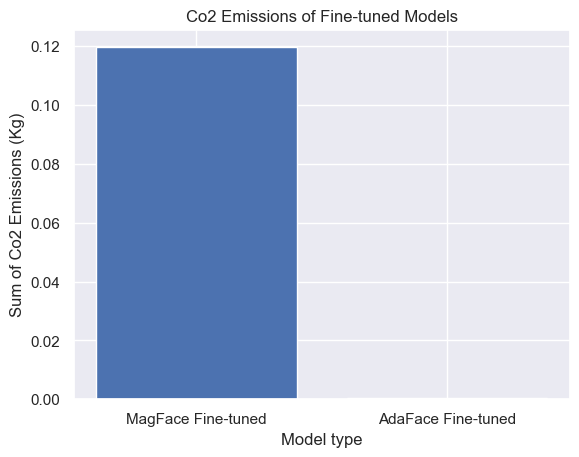

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots()

models = ['MagFace Fine-tuned', 'AdaFace Fine-tuned']
sums = [df[df.run_type == "magface-fine-tuner"].co2_emission.sum(), df[df.run_type == "adaface-fine-tuner"].co2_emission.sum()]
bar_labels = ['red', 'blue']

ax.bar(models, sums, label=bar_labels)

ax.set_ylabel('Sum of Co2 Emissions (Kg)')
ax.set_xlabel('Model type')

ax.set_title('Co2 Emissions of Fine-tuned Models')

plt.show()